In [ ]:
!git clone --recursive https://github.com/AILab-CVC/YOLO-World
%cd YOLO-World/

Cloning into 'YOLO-World'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 197 (delta 41), reused 43 (delta 29), pack-reused 133
Receiving objects: 100% (197/197), 508.25 KiB | 4.58 MiB/s, done.
Resolving deltas: 100% (69/69), done.
Submodule 'third_party/mmyolo' (https://github.com/onuralpszr/mmyolo.git) registered for path 'third_party/mmyolo'
Cloning into '/content/YOLO-World/third_party/mmyolo'...
remote: Enumerating objects: 4944, done.        
remote: Counting objects: 100% (1388/1388), done.        
remote: Compressing objects: 100% (290/290), done.        
remote: Total 4944 (delta 1180), reused 1102 (delta 1098), pack-reused 3556        
Receiving objects: 100% (4944/4944), 3.61 MiB | 17.01 MiB/s, done.
Resolving deltas: 100% (3195/3195), done.
Submodule path 'third_party/mmyolo': checked out '4d97b3a06609dba94b8ec584be2f2029cfdb7519'
/content/YOLO-World


In [ ]:
import os
# Install certain version of requests,tqdm,rich for openxlab (fix for yolo_world)
# Install mmcv before avoding compiling of mmcv and shortining waiting time installs "whl" file
if 'COLAB_GPU' in os.environ:
  !pip install requests==2.28.2 tqdm==4.65.0 rich==13.4.2
  %pip install -U openmim
  !mim install "mmengine>=0.7.0"
  !mim install "mmcv"
else:
  !pip install torch wheel requests==2.28.2 tqdm==4.65.0 rich==13.4.2


!pip install -e . -vv

In [ ]:
# Restart collab session (required for mmengine)
quit()

In [ ]:
!wget https://huggingface.co/spaces/stevengrove/YOLO-World/resolve/main/yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth?download=true
!mv yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth?download=true yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth
!wget https://huggingface.co/spaces/stevengrove/YOLO-World/resolve/main/configs/pretrain/yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py?download=true
!mv yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py?download=true yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py
!wget https://media.roboflow.com/notebooks/examples/dog.jpeg
!cp -r yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py /content/YOLO-World/configs/pretrain/

In [4]:
import numpy as np
import torch
from mmengine.config import Config
from mmengine.dataset import Compose
from mmengine.runner import Runner
from mmengine.runner.amp import autocast
from mmyolo.registry import RUNNERS
from torchvision.ops import nms


if __name__ == "__main__":
    # load config
    cfg = Config.fromfile(
        "configs/fisheye8k/yolo_world_x.py"
    )
    cfg.work_dir = "work_dirs"
    cfg.load_from = "work_dirs/yolo_world_x/epoch_110.pth"
    runner = Runner.from_cfg(cfg)
    runner.call_hook("before_run")
    runner.load_or_resume()
    pipeline = cfg.test_dataloader.dataset.pipeline
    runner.pipeline = Compose(pipeline)
    runner.model.eval()

02/22 13:57:01 - mmengine - WARNING - Failed to search registry with scope "mmyolo" in the "log_processor" registry tree. As a workaround, the current "log_processor" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmyolo" is a correct scope, or whether the registry is initialized.
02/22 13:57:01 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.18 (default, Sep 11 2023, 13:40:15) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1378608208
    GPU 0,1: NVIDIA RTX A6000
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.1, V12.1.105
    GCC: gcc (Ubuntu 10.5.0-1ubuntu1~22.04) 10.5.0
    PyTorch: 1.10.1
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.2 Product B

02/22 13:57:02 - mmengine - INFO - Config:
_backend_args = None
_multiscale_resize_transforms = [
    dict(
        transforms=[
            dict(scale=(
                640,
                640,
            ), type='YOLOv5KeepRatioResize'),
            dict(
                allow_scale_up=False,
                pad_val=dict(img=114),
                scale=(
                    640,
                    640,
                ),
                type='LetterResize'),
        ],
        type='Compose'),
    dict(
        transforms=[
            dict(scale=(
                320,
                320,
            ), type='YOLOv5KeepRatioResize'),
            dict(
                allow_scale_up=False,
                pad_val=dict(img=114),
                scale=(
                    320,
                    320,
                ),
                type='LetterResize'),
        ],
        type='Compose'),
    dict(
        transforms=[
            dict(scale=(
                960,
             

/home/hpnquoc/miniconda3/envs/yolo-world/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


{'type': 'ImagePoolingAttentionModule', 'embed_channels': 256, 'num_heads': 8, 'image_channels': [320, 640, 640], 'text_channels': 512, 'num_feats': 3}
02/22 13:57:08 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
02/22 13:57:08 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(9           ) YOLOv5ParamSchedulerHook           
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
be

In [7]:
import PIL.Image
import supervision as sv

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_position=sv.Position.CENTER)

class_names = ("bus, bicycle, car, pedestrian, truck")

class_names2 = ("bus, bicycle, car, pedestrian, truck")

def run_image(
        runner,
        input_image,
        max_num_boxes=100,
        score_thr=0.05,
        nms_thr=0.5,
        output_image="output.png",
):
    texts = [[t.strip()] for t in class_names.split(",")] + [[" "]]
    data_info = runner.pipeline(dict(img_id=0, img_path=input_image,
                                     texts=texts))

    data_batch = dict(
        inputs=data_info["inputs"].unsqueeze(0),
        data_samples=[data_info["data_samples"]],
    )

    with autocast(enabled=False), torch.no_grad():
        output = runner.model.test_step(data_batch)[0]
        runner.model.class_names = texts
        pred_instances = output.pred_instances

    keep_idxs = nms(pred_instances.bboxes, pred_instances.scores, iou_threshold=nms_thr)
    pred_instances = pred_instances[keep_idxs]
    pred_instances = pred_instances[pred_instances.scores.float() > score_thr]

    if len(pred_instances.scores) > max_num_boxes:
        indices = pred_instances.scores.float().topk(max_num_boxes)[1]
        pred_instances = pred_instances[indices]
    output.pred_instances = pred_instances

    pred_instances = pred_instances.cpu().numpy()
    detections = sv.Detections(
        xyxy=pred_instances['bboxes'],
        class_id=pred_instances['labels'],
        confidence=pred_instances['scores']
    )

    labels = [
        f"{class_id} {confidence:0.2f}"
        for class_id, confidence
        in zip(detections.class_id, detections.confidence)
    ]

    image = PIL.Image.open(input_image)
    svimage = np.array(image)
    svimage = bounding_box_annotator.annotate(svimage, detections)
    svimage = label_annotator.annotate(svimage, detections, labels)
    return svimage[:, :, ::-1]


/home/hpnquoc/miniconda3/envs/yolo-world/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


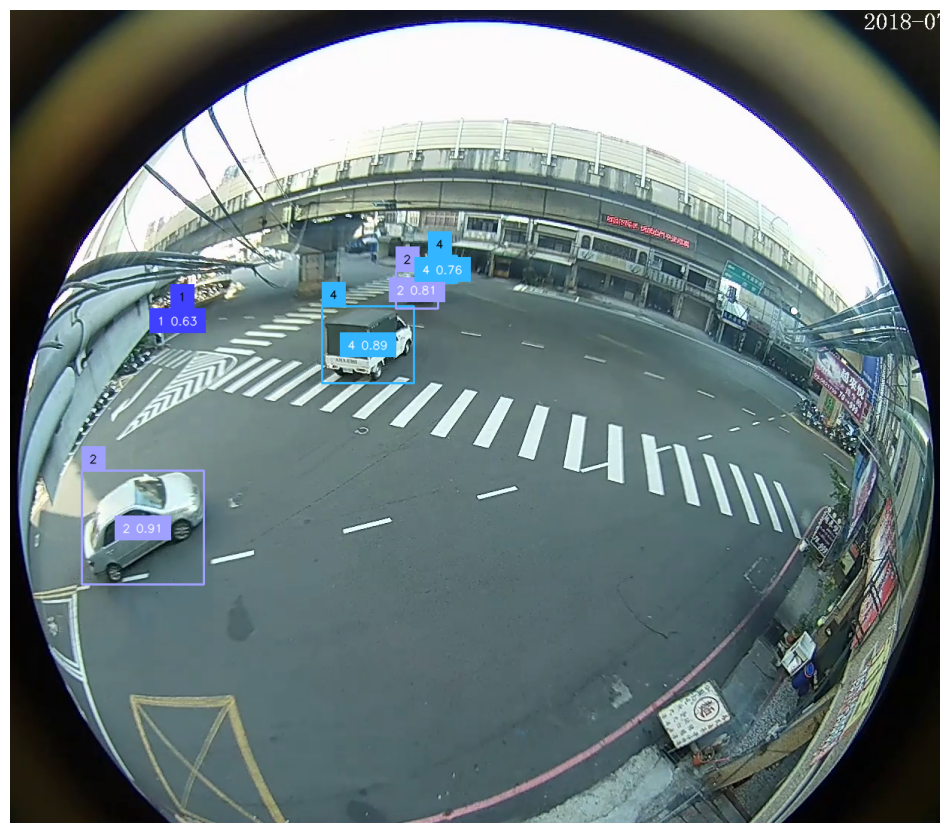

In [8]:
img = run_image(runner,"/home/hpnquoc/workspace/run/aic24/YOLO-World/work_dirs/demo.png")
sv.plot_image(img)